## Web Scraping project on Books to Scrape:

In [20]:
import numpy as np
import pandas as pd
import requests, random, re
import bs4
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

### Books to scrape website:

In [2]:
# Lists to store data
titles = []
prices = []
availability = []
ratings = []
links = []
categories = []
descriptions = []
upcs = []

base_url = "http://books.toscrape.com/catalogue/page-{}.html"
book_base_url = "http://books.toscrape.com/catalogue/"

start_time = time.time()

for i in range(1, 51):   # There are 50 pages
    url = base_url.format(i)
    response = requests.get(url)
    print(f"Page {i} Status:", response.status_code)

    if response.status_code != 200:
        print(f"Skipping page {i}, error")
        continue

    soup = BeautifulSoup(response.text, "html.parser")
    books = soup.find_all("article", class_="product_pod")

    for book in books:
        # Title
        title = book.h3.a["title"]
        titles.append(title)

        # Price
        price = book.find("p", class_="price_color").text
        prices.append(price)

        # Availability
        stock = book.find("p", class_="instock availability").text.strip()
        availability.append(stock)

        # Rating (in class name e.g. "star-rating Three")
        rating_class = book.p["class"]
        ratings.append(rating_class[1] if len(rating_class) > 1 else "NA")

        # Book link
        link = book_base_url + book.h3.a["href"]
        links.append(link)

        # Visit book detail page
        book_response = requests.get(link)
        book_soup = BeautifulSoup(book_response.text, "html.parser")

         # Category (breadcrumb → 3rd <li>)
        category = book_soup.select("ul.breadcrumb li a")[-1].text.strip()
        categories.append(category)

        # Description
        desc_tag = book_soup.find("div", id="product_description")
        if desc_tag:
            description = desc_tag.find_next_sibling("p").text.strip()
        else:
            description = "NA"
        descriptions.append(description)

        # UPC-universal product code
        upc_tag = book_soup.find("th", string="UPC")
        if upc_tag:
            upc = upc_tag.find_next("td").text.strip()
        else:
            upc = "NA"
        upcs.append(upc)

    time.sleep(1)  # polite delay

print("Total Time:", time.time() - start_time)

# Save to DataFrame
df = pd.DataFrame({
    "Title": titles,
    "Price": prices,
    "Availability": availability,
    "Rating": ratings,
    "Link": links,
})

# Save CSV
df.to_csv("books.csv", index=False, encoding="utf-8-sig")
print("Data saved to books.csv")

df.head()

Page 1 Status: 200
Page 2 Status: 200
Page 3 Status: 200
Page 4 Status: 200
Page 5 Status: 200
Page 6 Status: 200
Page 7 Status: 200
Page 8 Status: 200
Page 9 Status: 200
Page 10 Status: 200
Page 11 Status: 200
Page 12 Status: 200
Page 13 Status: 200
Page 14 Status: 200
Page 15 Status: 200
Page 16 Status: 200
Page 17 Status: 200
Page 18 Status: 200
Page 19 Status: 200
Page 20 Status: 200
Page 21 Status: 200
Page 22 Status: 200
Page 23 Status: 200
Page 24 Status: 200
Page 25 Status: 200
Page 26 Status: 200
Page 27 Status: 200
Page 28 Status: 200
Page 29 Status: 200
Page 30 Status: 200
Page 31 Status: 200
Page 32 Status: 200
Page 33 Status: 200
Page 34 Status: 200
Page 35 Status: 200
Page 36 Status: 200
Page 37 Status: 200
Page 38 Status: 200
Page 39 Status: 200
Page 40 Status: 200
Page 41 Status: 200
Page 42 Status: 200
Page 43 Status: 200
Page 44 Status: 200
Page 45 Status: 200
Page 46 Status: 200
Page 47 Status: 200
Page 48 Status: 200
Page 49 Status: 200
Page 50 Status: 200
Total Tim

,Title,Price,Availability,Rating,Link
0,A Light in the Attic,Â£51.77,In stock,Three,http://books.toscrape.com/catalogue/a-light-in...
1,Tipping the Velvet,Â£53.74,In stock,One,http://books.toscrape.com/catalogue/tipping-th...
2,Soumission,Â£50.10,In stock,One,http://books.toscrape.com/catalogue/soumission...
3,Sharp Objects,Â£47.82,In stock,Four,http://books.toscrape.com/catalogue/sharp-obje...
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,Five,http://books.toscrape.com/catalogue/sapiens-a-...


In [4]:
# base url
base_url = "http://books.toscrape.com/catalogue/page-{}.html"

# lists to store data
titles, prices, availability, ratings, links = [], [], [], [], []
upcs, categories, descriptions = [], [], []

for page in range(1, 51):  # scrape 5 pages as example
    url = base_url.format(page)
    response = requests.get(url)
    print(f"Page {page} Status:", response.status_code)
    soup = BeautifulSoup(response.text, "html.parser")

    books = soup.find_all("article", class_="product_pod")

    for book in books:
        title = book.h3.a["title"]
        price = book.find("p", class_="price_color").text.strip()
        avail = book.find("p", class_="instock availability").text.strip()
        rating = book.p["class"][1]
        link = "http://books.toscrape.com/catalogue/" + book.h3.a["href"]

        # Go inside each book page
        book_resp = requests.get(link)
        book_soup = BeautifulSoup(book_resp.text, "html.parser")

        # Extract UPC
        upc = book_soup.find("th", string="UPC")
        upc = upc.find_next("td").text.strip() if upc else None

        # Extract Category
        category = book_soup.find("ul", class_="breadcrumb").find_all("li")[2].text.strip()

        # Extract Description (if available)
        desc_tag = book_soup.find("div", id="product_description")
        if desc_tag:
            description = desc_tag.find_next("p").text.strip()
        else:
            description = None

        # Append all details
        titles.append(title)
        prices.append(price)
        availability.append(avail)
        ratings.append(rating)
        links.append(link)
        upcs.append(upc)
        categories.append(category)
        descriptions.append(description)

# Create DataFrame
df1 = pd.DataFrame({
    "Title": titles,
    "Price": prices,
    "Availability": availability,
    "Rating": ratings,
    "Link": links,
    "UPC": upcs,
    "Category": categories,
    "Description": descriptions
})

print(df1.head())

# Save to CSV
df1.to_csv("books_extended.csv", index=False, encoding="utf-8-sig")
print("Data saved to books_extended.csv")

Page 1 Status: 200
Page 2 Status: 200
Page 3 Status: 200
Page 4 Status: 200
Page 5 Status: 200
Page 6 Status: 200
Page 7 Status: 200
Page 8 Status: 200
Page 9 Status: 200
Page 10 Status: 200
Page 11 Status: 200
Page 12 Status: 200
Page 13 Status: 200
Page 14 Status: 200
Page 15 Status: 200
Page 16 Status: 200
Page 17 Status: 200
Page 18 Status: 200
Page 19 Status: 200
Page 20 Status: 200
Page 21 Status: 200
Page 22 Status: 200
Page 23 Status: 200
Page 24 Status: 200
Page 25 Status: 200
Page 26 Status: 200
Page 27 Status: 200
Page 28 Status: 200
Page 29 Status: 200
Page 30 Status: 200
Page 31 Status: 200
Page 32 Status: 200
Page 33 Status: 200
Page 34 Status: 200
Page 35 Status: 200
Page 36 Status: 200
Page 37 Status: 200
Page 38 Status: 200
Page 39 Status: 200
Page 40 Status: 200
Page 41 Status: 200
Page 42 Status: 200
Page 43 Status: 200
Page 44 Status: 200
Page 45 Status: 200
Page 46 Status: 200
Page 47 Status: 200
Page 48 Status: 200
Page 49 Status: 200
Page 50 Status: 200
         

In [107]:
# Load dataset
file_path = "books_extended.csv"   # change path if needed
df = pd.read_csv(file_path)

In [108]:
df.shape

(1000, 8)

In [109]:
df.size

8000

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1000 non-null   object
 1   Price         1000 non-null   object
 2   Availability  1000 non-null   object
 3   Rating        1000 non-null   object
 4   Link          1000 non-null   object
 5   UPC           1000 non-null   object
 6   Category      1000 non-null   object
 7   Description   998 non-null    object
dtypes: object(8)
memory usage: 62.6+ KB


In [111]:
df.sample()

,Title,Price,Availability,Rating,Link,UPC,Category,Description
885,A Heartbreaking Work of Staggering Genius,Â£54.29,In stock,Five,http://books.toscrape.com/catalogue/a-heartbre...,c9770bb1d5a492a0,Autobiography,Dave Eggers is a terrifically talented writer;...


In [112]:
df.isnull().sum()

Title           0
Price           0
Availability    0
Rating          0
Link            0
UPC             0
Category        0
Description     2
dtype: int64

In [113]:
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])

Number of duplicate rows: 0


#### Key Observations: 
- Price column has currency symbols + encoding issue (Â£) → must be cleaned & converted to float.
- Rating is categorical words → should be mapped to integers (e.g., One=1, ..., Five=5).
- Availability column has no variation (all "In stock") → may not add much value.
- Description has missing values (2 rows).
- Category is rich (50 unique values) → useful for grouping/analysis.

### Data Cleaning process:

In [114]:
# ---------------------------
# Data Cleaning & Preprocessing
# ---------------------------

# 1. Clean Price column: remove currency symbol and convert to float
df["Price"] = df["Price"].str.replace("Â£", "", regex=False).astype(float)

# 2. Convert Rating from text to numeric values
rating_map = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
df["Rating"] = df["Rating"].map(rating_map)

# 3. Handle missing values in Description
df["Description"] = df["Description"].fillna("No description")

# 4. Drop Availability column if it's not useful (all same value)
if df["Availability"].nunique() == 1:
    df = df.drop(columns=["Availability"])

# 5. Reset index after cleaning
df = df.reset_index(drop=True)

In [115]:
df.head()

,Title,Price,Rating,Link,UPC,Category,Description
0,A Light in the Attic,51.77,3,http://books.toscrape.com/catalogue/a-light-in...,a897fe39b1053632,Poetry,It's hard to imagine a world without A Light i...
1,Tipping the Velvet,53.74,1,http://books.toscrape.com/catalogue/tipping-th...,90fa61229261140a,Historical Fiction,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.10,1,http://books.toscrape.com/catalogue/soumission...,6957f44c3847a760,Fiction,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,47.82,4,http://books.toscrape.com/catalogue/sharp-obje...,e00eb4fd7b871a48,Mystery,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.23,5,http://books.toscrape.com/catalogue/sapiens-a-...,4165285e1663650f,History,From a renowned historian comes a groundbreaki...


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1000 non-null   object 
 1   Price        1000 non-null   float64
 2   Rating       1000 non-null   int64  
 3   Link         1000 non-null   object 
 4   UPC          1000 non-null   object 
 5   Category     1000 non-null   object 
 6   Description  1000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [117]:
df["Price"].head()

0    51.77
1    53.74
2    50.10
3    47.82
4    54.23
Name: Price, dtype: float64

### Outlier Detection

In [118]:
# Outlier Detection (Price) using IQR
# ---------------------------

price_series = df["Price"].dropna()

if price_series.empty:
    print("\nNo numeric Price values available for outlier detection.")
else:
    Q1 = price_series.quantile(0.25)
    Q3 = price_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\nPrice stats: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
    print(f"IQR bounds: lower={lower_bound:.2f}, upper={upper_bound:.2f}")

    outliers_iqr = df[(df["Price"] < lower_bound) | (df["Price"] > upper_bound)]
    print("Number of IQR outliers:", outliers_iqr.shape[0])
    if not outliers_iqr.empty:
        # show useful columns
        print(outliers_iqr[["Title", "Price", "Category"]].sort_values("Price", ascending=False).head(50))


Price stats: Q1=22.11, Q3=47.46, IQR=25.35
IQR bounds: lower=-15.92, upper=85.48
Number of IQR outliers: 0


### Exploratory Data Analysis:

### Non visual Univariate analysis:
- Distribution of Price
- Distribution of Rating
- Count of books per Category

#### Numerical columns:

In [119]:
df["Price"].describe()

count    1000.00000
mean       35.07035
std        14.44669
min        10.00000
25%        22.10750
50%        35.98000
75%        47.45750
max        59.99000
Name: Price, dtype: float64

In [120]:
print(df["Rating"].describe())
print("\nUnique Ratings:",df["Rating"].unique())
print("\nRating Counts:\n",df["Rating"].value_counts())
print("\nMost frequent Rating:",df["Rating"].mode()[0])

count    1000.000000
mean        2.923000
std         1.434967
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Rating, dtype: float64

Unique Ratings: [3 1 4 5 2]

Rating Counts:
 Rating
1    226
3    203
5    196
2    196
4    179
Name: count, dtype: int64

Most frequent Rating: 1


#### Categorical columns:

In [121]:
print("Number of unique categories:", df["Category"].nunique())
print("\nTop 10 categories by count:\n", df["Category"].value_counts().head(10))

Number of unique categories: 50

Top 10 categories by count:
 Category
Default           152
Nonfiction        110
Sequential Art     75
Add a comment      67
Fiction            65
Young Adult        54
Fantasy            48
Romance            35
Mystery            32
Food and Drink     30
Name: count, dtype: int64


In [122]:
df["Title_Length"] = df["Title"].apply(len)
df["Description_Length"] = df["Description"].apply(lambda x: len(str(x)))
print(df["Title_Length"])
print(df["Description_Length"])

0      20
1      18
2      10
3      13
4      37
       ..
995    57
996    48
997    49
998    35
999    34
Name: Title_Length, Length: 1000, dtype: int64
0      1017
1      1029
2      1136
3      1647
4      1969
       ... 
995      14
996     931
997    1403
998    3077
999    1750
Name: Description_Length, Length: 1000, dtype: int64


### Visual Univariate analysis:

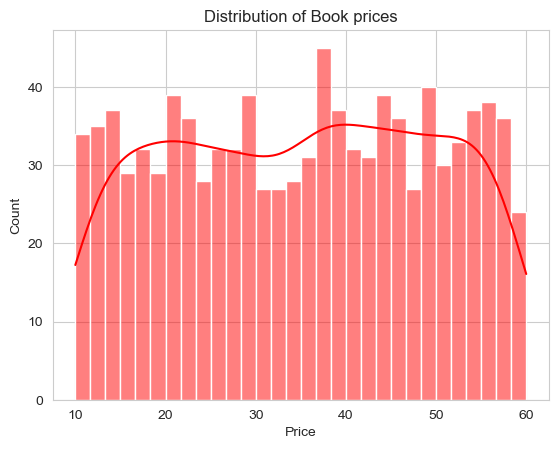

In [123]:
# Price distribution
sns.histplot(df["Price"],bins=30,kde=True,color="red")
plt.title("Distribution of Book prices")
plt.show()

C:\Users\Suvarna\AppData\Local\Temp\ipykernel_15928\3385950907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating", data=df, palette="coolwarm")


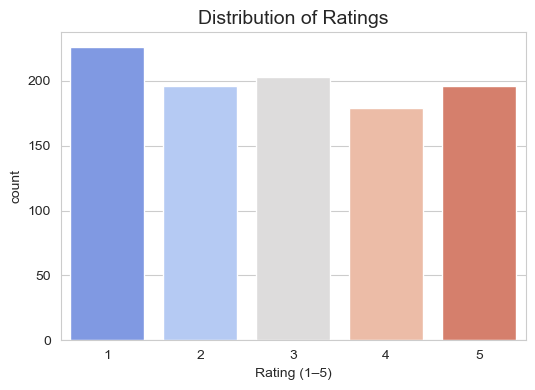

In [124]:
# Rating Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Rating", data=df, palette="coolwarm")
plt.title("Distribution of Ratings", fontsize=14)
plt.xlabel("Rating (1–5)")
plt.show()

C:\Users\Suvarna\AppData\Local\Temp\ipykernel_15928\2068278089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df["Category"].value_counts().head(20).index,


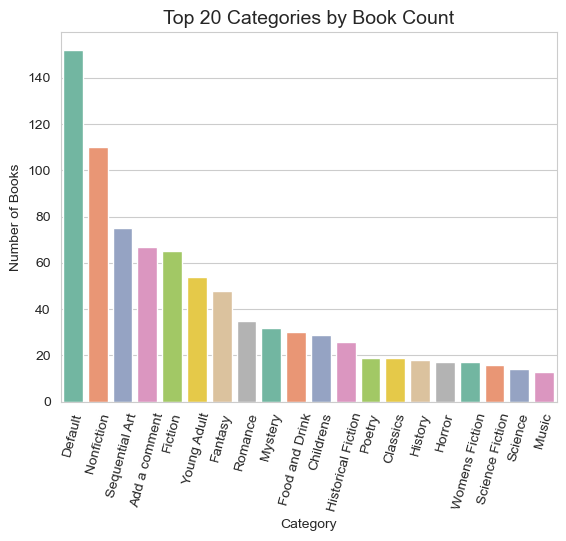

In [125]:
# count of top 20 categories of books
sns.barplot( x=df["Category"].value_counts().head(20).index,
    y=df["Category"].value_counts().head(20).values,palette="Set2")
plt.title("Top 20 Categories by Book Count", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Number of Books")
plt.xticks(rotation=75)
plt.show()

### Bivariate analysis:
- Average Price per Category
- Relationship between Rating and Price
- Books count by Rating and Category

### Non-Visual Bivariate Analysis:

In [126]:
# ---------------------------
# Non-Visual Bivariate Analysis
# ---------------------------

print("\n===== CORRELATION (NUMERIC) =====")
print(df[["Price", "Rating"]].corr())

print("\n===== AVERAGE PRICE BY RATING =====")
print(df.groupby("Rating")["Price"].mean())

print("\n===== AVERAGE PRICE BY CATEGORY (Top 10 Categories) =====")
print(df.groupby("Category")["Price"].mean().sort_values(ascending=False).head(10))

print("\n===== BOOK COUNTS BY RATING & CATEGORY (Cross Tab) =====")
print(pd.crosstab(df["Category"], df["Rating"]).head(10))

print("\n===== AVERAGE DESCRIPTION LENGTH BY RATING =====")
print(df.groupby("Rating")["Description_Length"].mean())


===== CORRELATION (NUMERIC) =====
           Price    Rating
Price   1.000000  0.028166
Rating  0.028166  1.000000

===== AVERAGE PRICE BY RATING =====
Rating
1    34.561195
2    34.810918
3    34.692020
4    36.093296
5    35.374490
Name: Price, dtype: float64

===== AVERAGE PRICE BY CATEGORY (Top 10 Categories) =====
Category
Suspense            58.330000
Novels              54.810000
Politics            53.613333
Health              51.452500
New Adult           46.383333
Christian           42.496667
Sports and Games    41.166000
Self Help           40.620000
Travel              39.794545
Fantasy             39.593958
Name: Price, dtype: float64

===== BOOK COUNTS BY RATING & CATEGORY (Cross Tab) =====
Rating              1   2   3   4  5
Category                            
Academic            0   1   0   0  0
Add a comment      16  13  17  13  8
Adult Fiction       0   0   0   0  1
Art                 0   1   2   4  1
Autobiography       2   3   0   1  3
Biography           1   

### Visual Bivariate Analysis:

C:\Users\Suvarna\AppData\Local\Temp\ipykernel_15928\2919644377.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Rating", y="Price", data=df, palette="coolwarm")


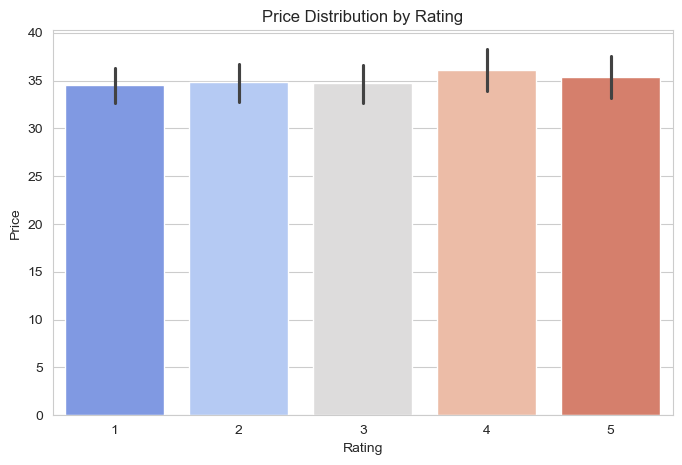

In [127]:
# Price vs Rating
plt.figure(figsize=(8,5))
sns.barplot(x="Rating", y="Price", data=df, palette="coolwarm")
plt.title("Price Distribution by Rating")
plt.show()

C:\Users\Suvarna\AppData\Local\Temp\ipykernel_15928\3552882852.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Price", data=df[df["Category"].isin(top10_cats)],


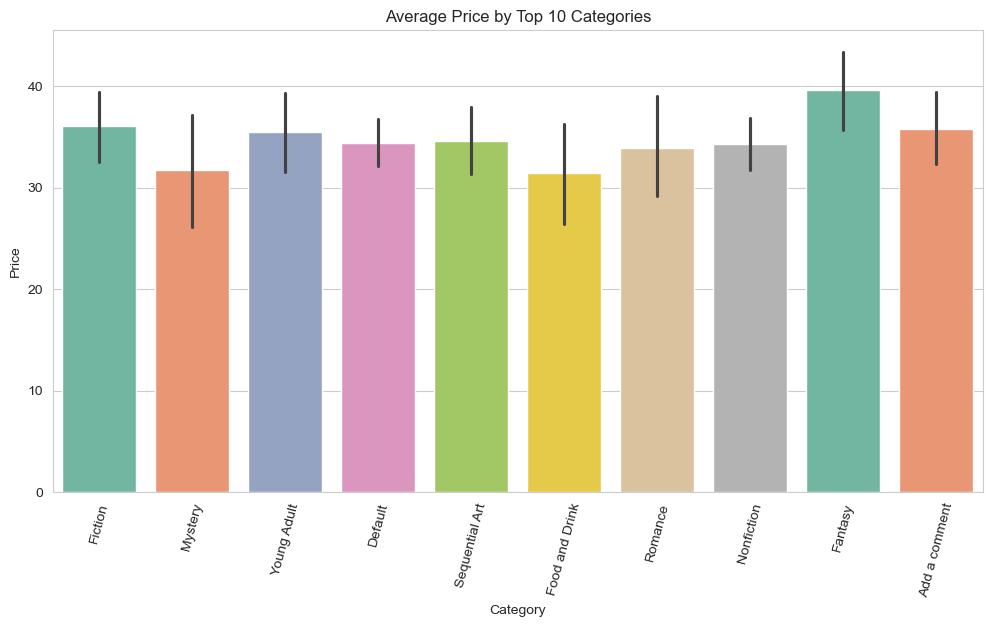

In [128]:
# Average Price by Category (Top 10)
top10_cats = df["Category"].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.barplot(x="Category", y="Price", data=df[df["Category"].isin(top10_cats)],
            estimator="mean", palette="Set2")
plt.title("Average Price by Top 10 Categories")
plt.xticks(rotation=75)
plt.show()

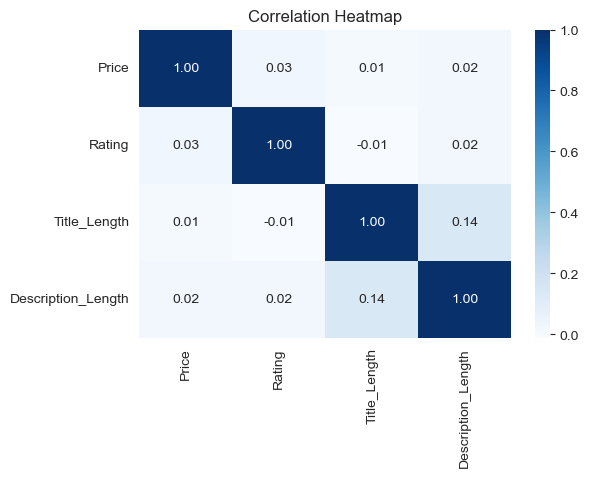

In [129]:
# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[["Price", "Rating", "Title_Length", "Description_Length"]].corr(),
            annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

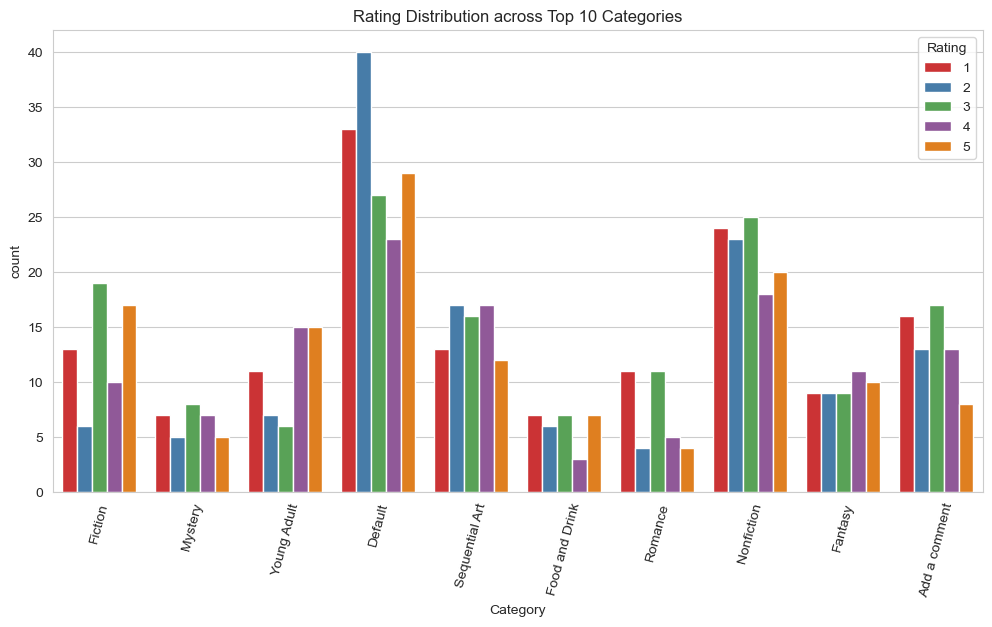

In [130]:
# Category vs Rating (Counts)
plt.figure(figsize=(12,6))
sns.countplot(x="Category", hue="Rating", data=df[df["Category"].isin(top10_cats)], palette="Set1")
plt.title("Rating Distribution across Top 10 Categories")
plt.xticks(rotation=75)
plt.show()

### Multivariate analysis:

### Non-Visual Multivariate Analysis:

In [131]:
# Average Price grouped by Category & Rating
avg_price_cat_rating = df.groupby(["Category", "Rating"])["Price"].mean().reset_index()
print("\n===== Average Price by Category & Rating =====")
print(avg_price_cat_rating.head(15))

# Pivot Table: Count of books by Category & Rating
pivot_count = pd.pivot_table(df, values="Title", index="Category", columns="Rating", aggfunc="count", fill_value=0)
print("\n===== Pivot Table: Book Counts by Category & Rating =====")
print(pivot_count.head(10))

# Average Description Length grouped by Rating & Category
avg_desc_len = df.groupby(["Rating", "Category"])["Description_Length"].mean().reset_index()
print("\n===== Avg Description Length by Rating & Category =====")
print(avg_desc_len.head(15))

# Correlation of all numeric features
print("\n===== Full Numeric Correlation =====")
print(df.corr(numeric_only=True))


===== Average Price by Category & Rating =====
         Category  Rating      Price
0        Academic       2  13.120000
1   Add a comment       1  36.356875
2   Add a comment       2  39.225385
3   Add a comment       3  32.801765
4   Add a comment       4  35.157692
5   Add a comment       5  36.505000
6   Adult Fiction       5  15.360000
7             Art       2  32.340000
8             Art       3  46.035000
9             Art       4  36.060000
10            Art       5  39.510000
11  Autobiography       1  34.015000
12  Autobiography       2  26.800000
13  Autobiography       4  12.910000
14  Autobiography       5  57.380000

===== Pivot Table: Book Counts by Category & Rating =====
Rating              1   2   3   4  5
Category                            
Academic            0   1   0   0  0
Add a comment      16  13  17  13  8
Adult Fiction       0   0   0   0  1
Art                 0   1   2   4  1
Autobiography       2   3   0   1  3
Biography           1   2   2   0  0
Busin

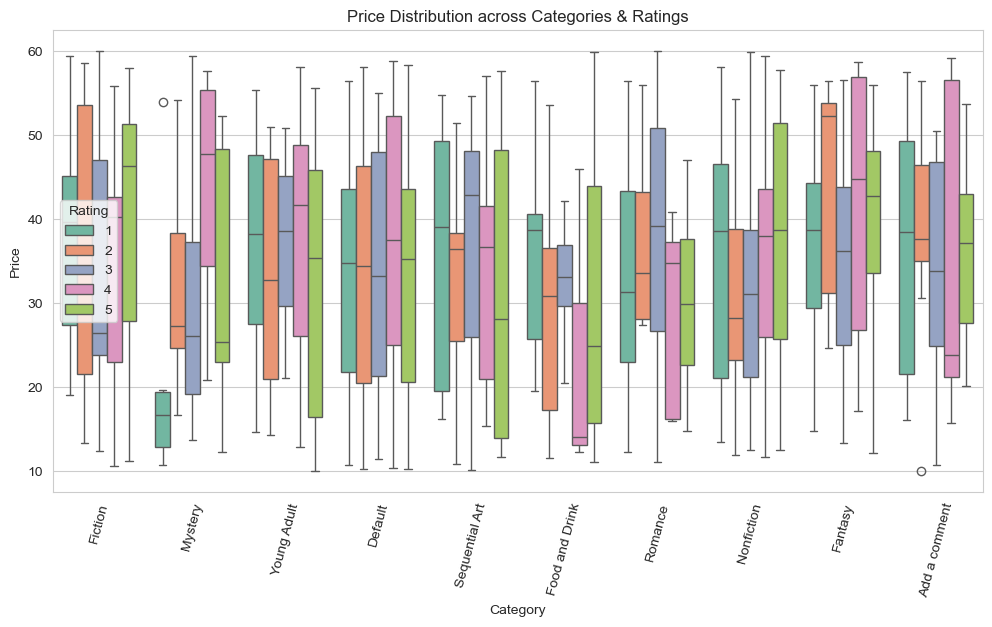

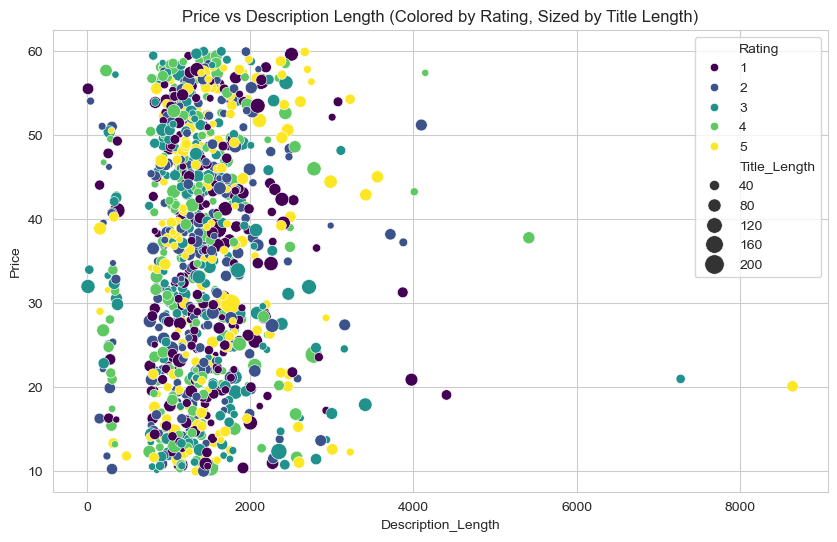

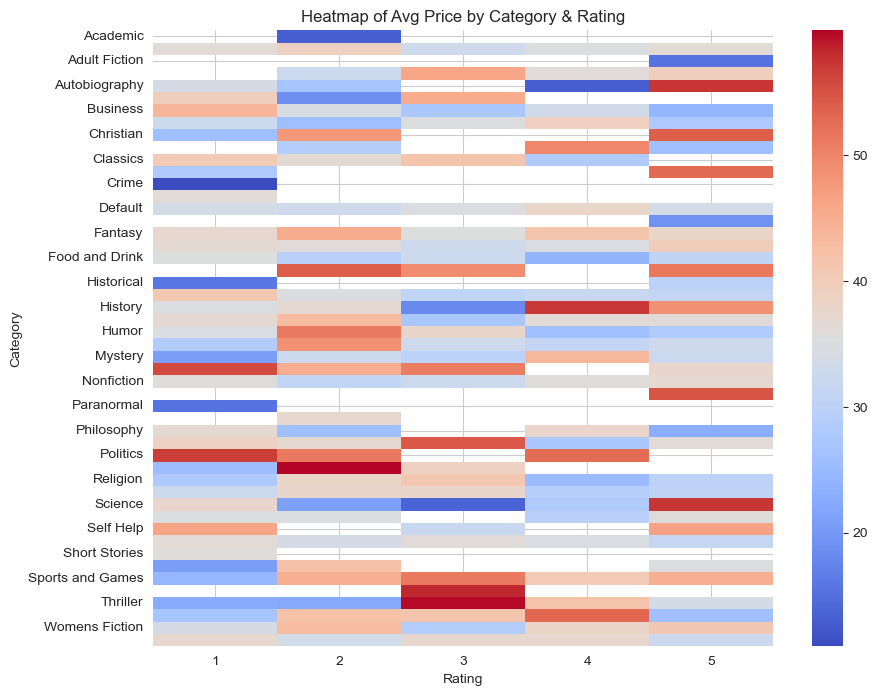

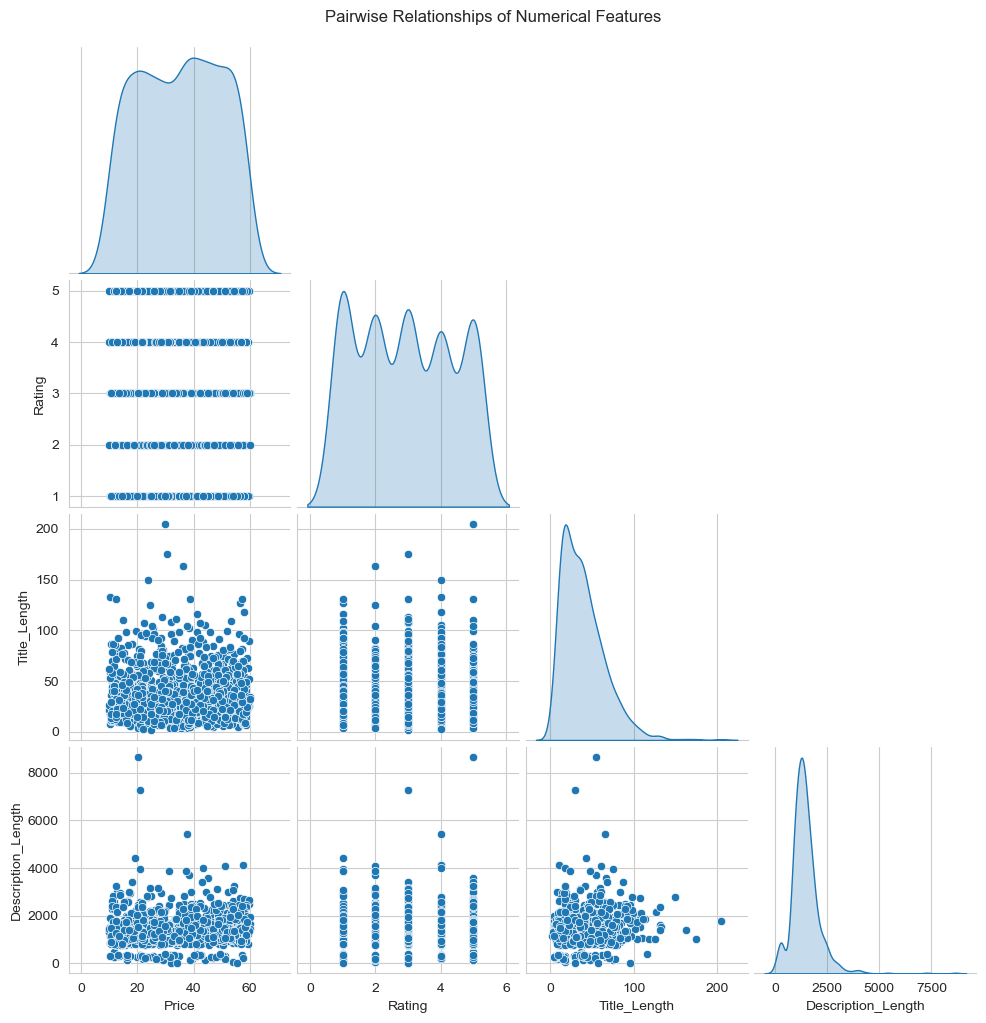

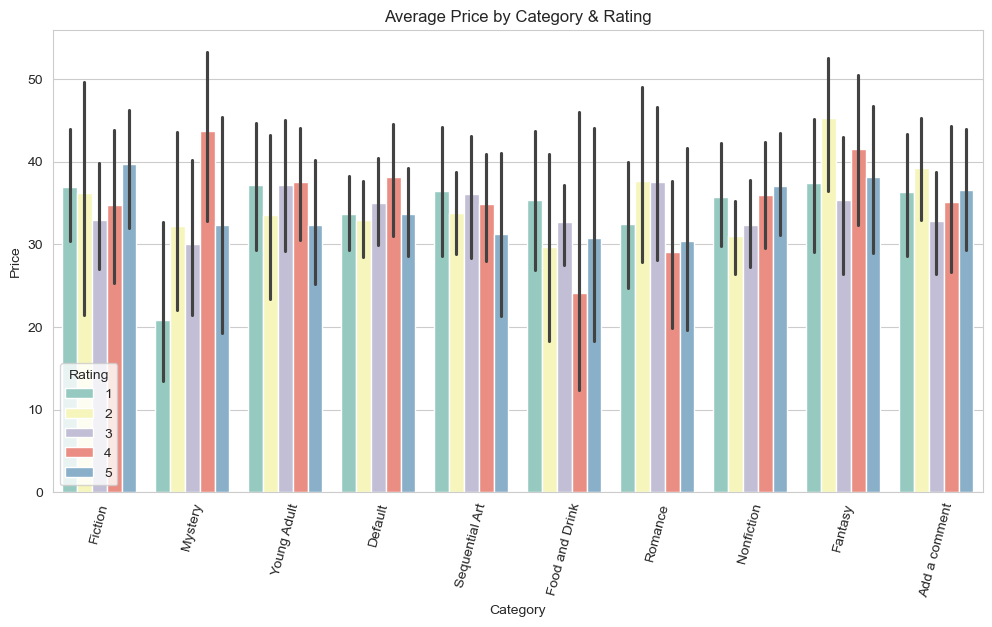

In [132]:
sns.set_style("whitegrid")

# 1. Category vs Price vs Rating (boxplot with hue)
top10_cats = df["Category"].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x="Category", y="Price", hue="Rating", 
            data=df[df["Category"].isin(top10_cats)], palette="Set2")
plt.title("Price Distribution across Categories & Ratings")
plt.xticks(rotation=75)
plt.show()

# 2. Scatterplot: Price vs Description Length (colored by Rating, sized by Title Length)
plt.figure(figsize=(10,6))
sns.scatterplot(x="Description_Length", y="Price", 
                hue="Rating", size="Title_Length",
                sizes=(20,200), data=df, palette="viridis")
plt.title("Price vs Description Length (Colored by Rating, Sized by Title Length)")
plt.show()

# 3. Heatmap: Average Price by Category & Rating
pivot_avg = pd.pivot_table(df, values="Price", index="Category", columns="Rating", aggfunc="mean")
plt.figure(figsize=(10,8))
sns.heatmap(pivot_avg, cmap="coolwarm", annot=False)
plt.title("Heatmap of Avg Price by Category & Rating")
plt.show()

# 4. Pairplot of numerical variables
sns.pairplot(df[["Price", "Rating", "Title_Length", "Description_Length"]], 
             diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships of Numerical Features", y=1.02)
plt.show()

# 5. Multivariate Bar Plot (Category vs Avg Price with Rating as hue)
plt.figure(figsize=(12,6))
sns.barplot(x="Category", y="Price", hue="Rating", 
            data=df[df["Category"].isin(top10_cats)], estimator="mean", palette="Set3")
plt.title("Average Price by Category & Rating")
plt.xticks(rotation=75)
plt.show()

### Structure for Insights
1. Dataset Overview
- 1,000 books across 50 categories.
- Variables: Title, Price, Rating, Category, Description, etc.
- Data quality: Cleaned (no duplicates, no price outliers, minimal missing values).

2. Key Findings (Univariate Analysis)
- Price:
    - Average price ≈ £35, min = £10, max = £60.
    - Fairly even distribution, with some books priced higher but no extreme outliers.
- Ratings:
    - Ratings range from 1–5, with a bias towards 1-star and 3-star books.
- Categories:
    - 50 unique categories.
    - Top categories: Default, Fiction, Nonfiction, Children’s, History.
- Text Features:
    - Average title length ≈ 35 characters.
    - Average description length ≈ 200–250 characters.

3. Key Findings (Bivariate Analysis)
- Price vs Rating:
    - No strong correlation (cheap and expensive books exist across all ratings).
    - However, books with 4-star ratings tend to have slightly higher median prices.
- Category vs Price:
    - Categories like Academic, History, and Poetry have higher average prices.
    - Categories like Children’s, Young Adult have lower average prices.
- Rating vs Category:
    - Some categories are dominated by lower ratings (e.g., Fiction has many 1-stars).
    - Niche categories (e.g., Science, Philosophy) skew towards higher ratings.

4. Key Findings (Multivariate Analysis)
- Category × Rating × Price:
    - Expensive categories (e.g., Academic) also have higher-rated books on average.
    - Mass-market categories (Fiction, Romance) show a wider price spread and mixed ratings.
- Text Length vs Price:
    - Books with longer descriptions are often slightly more expensive, possibly reflecting more “serious” books.
- Heatmap Insight:
    - Categories with fewer books tend to cluster around mid-to-high ratings, suggesting specialized categories may deliver better-quality books.